# **Load Data**

In [36]:
from scipy.spatial import distance
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN #To check our data

In [37]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [38]:
!kaggle datasets download -d saraferguswps/california-housing

california-housing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
df = pd.read_csv("/content/california-housing.zip")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [41]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


# **PCA**

In [42]:
X = df.to_numpy()
X

array([[-1.22050e+02,  3.73700e+01,  2.70000e+01, ...,  6.06000e+02,
         6.60850e+00,  3.44700e+05],
       [-1.18300e+02,  3.42600e+01,  4.30000e+01, ...,  2.77000e+02,
         3.59900e+00,  1.76500e+05],
       [-1.17810e+02,  3.37800e+01,  2.70000e+01, ...,  4.95000e+02,
         5.79340e+00,  2.70500e+05],
       ...,
       [-1.19700e+02,  3.63000e+01,  1.00000e+01, ...,  2.20000e+02,
         2.28950e+00,  6.20000e+04],
       [-1.17120e+02,  3.41000e+01,  4.00000e+01, ...,  1.40000e+01,
         3.27080e+00,  1.62500e+05],
       [-1.19630e+02,  3.44200e+01,  4.20000e+01, ...,  2.60000e+02,
         8.56080e+00,  5.00001e+05]])

In [43]:
X_meaned = X - np.mean(X , axis = 0)
print (X_meaned)

[[-2.46080000e+00  1.73461000e+00 -1.84533333e+00 ...  1.16088000e+02
   2.80122820e+00  1.38853725e+05]
 [ 1.28920000e+00 -1.37539000e+00  1.41546667e+01 ... -2.12912000e+02
  -2.08271800e-01 -2.93462750e+04]
 [ 1.77920000e+00 -1.85539000e+00 -1.84533333e+00 ...  5.08800000e+00
   1.98612820e+00  6.46537250e+04]
 ...
 [-1.10800000e-01  6.64610000e-01 -1.88453333e+01 ... -2.69912000e+02
  -1.51777180e+00 -1.43846275e+05]
 [ 2.46920000e+00 -1.53539000e+00  1.11546667e+01 ... -4.75912000e+02
  -5.36471800e-01 -4.33462750e+04]
 [-4.08000000e-02 -1.21539000e+00  1.31546667e+01 ... -2.29912000e+02
   4.75352820e+00  2.94154725e+05]]


In [44]:
X_meaned

array([[-2.46080000e+00,  1.73461000e+00, -1.84533333e+00, ...,
         1.16088000e+02,  2.80122820e+00,  1.38853725e+05],
       [ 1.28920000e+00, -1.37539000e+00,  1.41546667e+01, ...,
        -2.12912000e+02, -2.08271800e-01, -2.93462750e+04],
       [ 1.77920000e+00, -1.85539000e+00, -1.84533333e+00, ...,
         5.08800000e+00,  1.98612820e+00,  6.46537250e+04],
       ...,
       [-1.10800000e-01,  6.64610000e-01, -1.88453333e+01, ...,
        -2.69912000e+02, -1.51777180e+00, -1.43846275e+05],
       [ 2.46920000e+00, -1.53539000e+00,  1.11546667e+01, ...,
        -4.75912000e+02, -5.36471800e-01, -4.33462750e+04],
       [-4.08000000e-02, -1.21539000e+00,  1.31546667e+01, ...,
        -2.29912000e+02,  4.75352820e+00,  2.94154725e+05]])

In [45]:
print(X.shape)
print (X_meaned.shape)

(3000, 9)
(3000, 9)


In [46]:
cov_mat = np.cov(X_meaned , rowvar = False) 

In [47]:
print (cov_mat.shape)
print (cov_mat)

(9, 9)
[[ 3.97977082e+00 -3.92998354e+00 -1.60811230e+00  2.14433055e+02
   5.87650778e+01  2.29376803e+02  3.72241785e+01 -6.91881291e-02
  -1.14327626e+04]
 [-3.92998354e+00  4.53549228e+00 -6.72300447e-01 -1.81938962e+02
  -6.04112879e+01 -2.57479345e+02 -5.31499357e+01 -2.85795709e-01
  -3.33483768e+04]
 [-1.60811230e+00 -6.72300447e-01  1.57637958e+02 -9.95560804e+03
  -1.68644711e+03 -3.88021721e+03 -1.40013165e+03 -3.36025631e+00
   1.29825030e+05]
 [ 2.14433055e+02 -1.81938962e+02 -9.95560804e+03  4.64658261e+06
   8.40206340e+05  1.86348487e+06  7.20052027e+05  8.84457656e+02
   3.91185334e+07]
 [ 5.87650778e+01 -6.04112879e+01 -1.68644711e+03  8.40206340e+05
   1.72768554e+05  3.66833244e+05  1.47447918e+05  1.85196566e+01
   3.86866131e+06]
 [ 2.29376803e+02 -2.57479345e+02 -3.88021721e+03  1.86348487e+06
   3.66833244e+05  1.06201890e+06  3.37242053e+05  6.18459724e+01
  -1.38929495e+05]
 [ 3.72241785e+01 -5.31499357e+01 -1.40013165e+03  7.20052027e+05
   1.47447918e+05  3.

In [48]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [49]:
print (eigen_vectors.shape)
print (eigen_values)

(9, 9)
[2.13167578e-01 1.19260257e+00 7.80110654e+00 1.31118481e+02
 3.26905663e+03 2.73273256e+04 2.52861565e+05 5.60932749e+06
 1.27961858e+10]


In [50]:
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print (sorted_eigenvectors)
print ('**********')
print (sorted_eigenvalue)

[8 7 6 5 4 3 2 1 0]
[[ 8.93393153e-07  5.86015230e-05 -4.31111762e-04 -3.22213050e-04
   5.23625434e-03 -8.25722128e-03  6.87701900e-01  1.23112593e-02
   7.25822731e-01]
 [ 2.60615212e-06 -3.32704169e-05  8.11581583e-04 -2.22310598e-04
  -4.49801097e-03 -9.97977414e-04 -7.25563731e-01 -2.06688040e-02
   6.87828566e-01]
 [-1.01431039e-05 -2.00811318e-03 -2.41570638e-03  6.58499797e-03
   8.70861294e-04  9.99692485e-01  5.46644417e-03 -2.20903378e-02
   6.56358042e-03]
 [-3.05817882e-03  8.93913854e-01  4.16497538e-01 -1.63193296e-01
  -2.81027850e-02  3.92190450e-03  4.90342451e-04  1.00629917e-03
  -1.31531958e-04]
 [-3.02536128e-04  1.66395108e-01 -2.51387468e-02  7.33787219e-01
   6.58144075e-01 -5.24114045e-03 -4.39359173e-03 -6.03990948e-03
  -2.44962405e-04]
 [ 1.03953528e-05  3.90511841e-01 -9.02073661e-01 -1.73563331e-01
   6.03134951e-02 -2.99561301e-04 -1.24942551e-03 -4.83423808e-05
   1.01723979e-04]
 [-3.23784533e-04  1.43941511e-01 -1.10238187e-01  6.36191860e-01
  -7.498

In [51]:
n_components =4  #select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [52]:
print (eigenvector_subset)

[[ 8.93393153e-07  5.86015230e-05 -4.31111762e-04 -3.22213050e-04]
 [ 2.60615212e-06 -3.32704169e-05  8.11581583e-04 -2.22310598e-04]
 [-1.01431039e-05 -2.00811318e-03 -2.41570638e-03  6.58499797e-03]
 [-3.05817882e-03  8.93913854e-01  4.16497538e-01 -1.63193296e-01]
 [-3.02536128e-04  1.66395108e-01 -2.51387468e-02  7.33787219e-01]
 [ 1.03953528e-05  3.90511841e-01 -9.02073661e-01 -1.73563331e-01]
 [-3.23784533e-04  1.43941511e-01 -1.10238187e-01  6.36191860e-01]
 [-1.10283830e-05  7.55385836e-05  5.28109157e-04 -4.05382685e-03]
 [-9.99995225e-01 -2.82662947e-03 -1.23978804e-03  6.92611788e-05]]


In [53]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
print(X_reduced)

[[-1.38857069e+05  8.47494682e+02  2.26082804e+02 -5.34539349e+01]
 [ 2.93495962e+04 -1.19019774e+03  1.47190808e+02 -1.79148754e+01]
 [-6.46564360e+04  7.30332913e+02  2.58704343e+02 -1.84706834e+02]
 ...
 [ 1.43850794e+05 -1.43335203e+03  1.72152433e+02 -3.17605899e+01]
 [ 4.33540204e+04 -2.79968315e+03  3.00342673e+02 -4.02386351e+01]
 [-2.94150620e+05 -1.90880111e+03 -9.40975549e+01 -7.27331258e+01]]


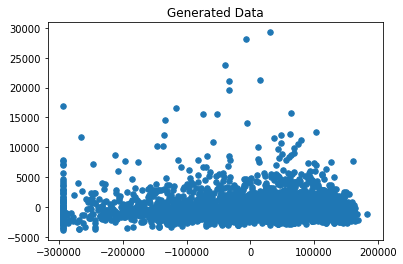

In [54]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1] , s=30)
plt.title('Generated Data');

In [55]:
X_ = np.dot(X_reduced,np.linalg.pinv(eigenvector_subset)) + np.mean(X , axis = 0)
X_

array([[-1.19743833e+02,  3.54406789e+01,  2.76537660e+01, ...,
         5.97931519e+02,  5.73874868e+00,  3.44700001e+05],
       [-1.19690410e+02,  3.58749179e+01,  3.04641499e+01, ...,
         2.81466848e+02,  3.54404398e+00,  1.76499999e+05],
       [-1.19656181e+02,  3.56936090e+01,  2.61933113e+01, ...,
         4.69943895e+02,  5.46088971e+00,  2.70500004e+05],
       ...,
       [-1.19608665e+02,  3.62047517e+01,  2.96395597e+01, ...,
         1.97832881e+02,  2.33222397e+00,  6.20000035e+04],
       [-1.19831049e+02,  3.60942219e+01,  3.30371586e+01, ...,
         1.41752929e+01,  3.43939713e+00,  1.62500000e+05],
       [-1.19899849e+02,  3.48720969e+01,  3.54103869e+01, ...,
         2.74498627e+02,  7.15224308e+00,  5.00000998e+05]])

In [56]:
df_ = pd.DataFrame(X_)
df_

,0,1,2,3,4,5,6,7,8
0,-119.743833,35.440679,27.653766,3884.701907,668.071663,1537.646207,597.931519,5.738749,344700.001391
1,-119.690410,35.874918,30.464150,1510.116302,306.182373,808.649870,281.466848,3.544044,176499.999480
2,-119.656181,35.693609,26.193311,3588.056958,528.996381,1486.018150,469.943895,5.460890,270500.004378
3,-119.918834,35.490781,36.369430,67.761511,-2.102689,47.436462,30.401508,5.072713,329999.996477
4,-119.579092,36.110247,29.221460,1240.762405,250.450599,850.592817,229.553059,2.664803,81700.001091
...,...,...,...,...,...,...,...,...,...
2995,-119.623279,35.225153,34.631897,1450.381860,634.036469,1257.271984,615.971204,2.227512,224999.998202
2996,-119.026110,34.728264,24.469225,5257.255513,1075.779235,3495.429987,1043.115598,4.099721,237199.998810
2997,-119.608665,36.204752,29.639560,955.248159,220.294628,694.771406,197.832881,2.332224,62000.003458
2998,-119.831049,36.094222,33.037159,95.977427,13.904095,45.992663,14.175293,3.439397,162500.000113


In [57]:
df_.describe()

,0,1,2,3,4,5,6,7,8
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-119.589200,35.635390,28.845333,2599.578667,529.950667,1402.798667,489.912000,3.807272,205846.275000
std,0.281620,0.510904,5.157209,2155.592732,413.947516,1030.537243,362.898616,1.451879,113119.687470
min,-121.035413,30.627508,-45.879841,5.764593,-227.525864,4.060728,-7.477241,-3.205476,22499.993999
25%,-119.760418,35.358725,27.442817,1401.722819,291.575583,779.393580,273.566676,2.799341,121200.011797
50%,-119.641032,35.673549,29.685428,2108.299636,436.273732,1157.303608,409.982990,3.465938,177649.999963
75%,-119.482733,35.970228,31.495410,3129.129152,640.086561,1742.502120,592.707637,4.550916,263975.001879
max,-115.894795,39.810437,40.408732,30467.523956,5515.410794,11958.398471,4820.142387,11.478298,500001.019253


# **DBscan Model**

In [58]:
def simple_DBSCAN(X, clusters, eps, minPts, metric=distance.euclidean):
   
    currentPoint = 0
    
    for i in range(0, X.shape[0]):
        if clusters[i] != 0:
            continue
    
        neighbors = neighborsGen(X, i, eps, metric)

        if len(neighbors) < minPts:
            clusters[i] = -1

        else:
            currentPoint += 1
            expand(X, clusters, i, neighbors, currentPoint, eps, minPts, metric)
    
    return clusters

In [59]:
def neighborsGen(X, point, eps, metric):

    neighbors = []
    
    for i in range(X.shape[0]):
        if metric(X[point], X[i]) < eps:
            neighbors.append(i)
    
    return neighbors

In [60]:
def expand(X, clusters, point, neighbors, currentPoint, eps, minPts, metric):
    
    clusters[point] = currentPoint
    
    i = 0
    while i < len(neighbors):
        
        nextPoint = neighbors[i]
        
        if clusters[nextPoint] == -1:
            clusters[nextPoint] = currentPoint
        
        elif clusters[nextPoint] == 0:
            clusters[nextPoint] = currentPoint
            
            nextNeighbors = neighborsGen(X, nextPoint, eps, metric)
            
            if len(nextNeighbors) >= minPts:
                neighbors = neighbors + nextNeighbors
        
        i += 1

In [61]:
class Basic_DBSCAN:
   
    def __init__(self, eps, minPts, metric=distance.euclidean):
        self.eps = eps
        self.minPts = minPts
        self.metric = metric
    
    def fit_predict(self, X):
    
    
        clusters = [0] * X.shape[0]
        
        simple_DBSCAN(X, clusters, self.eps, self.minPts, self.metric)
        
        return clusters

In [62]:
df = df.dropna() # dropping entries with missing values
df = df.head(1000) # taking the first 1000 entries; ~10% of the ~10%
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
995,-119.33,36.31,15.0,1472.0,228.0,892.0,257.0,5.3909,113000.0
996,-118.41,34.21,35.0,1789.0,292.0,897.0,267.0,5.5920,239900.0
997,-119.50,34.35,39.0,308.0,38.0,59.0,21.0,11.7794,500001.0
998,-118.33,34.11,48.0,1601.0,464.0,784.0,461.0,3.0642,342900.0


In [63]:
cols = df.columns
scanner = Basic_DBSCAN(eps=0.3, minPts=30)

def checkEqual(l1, l2):
 
    return len(l1) == len(l2) and sorted(l1) == sorted(l2)

Same Results: True


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


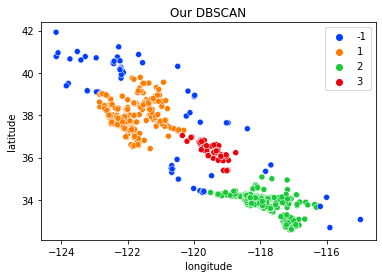

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


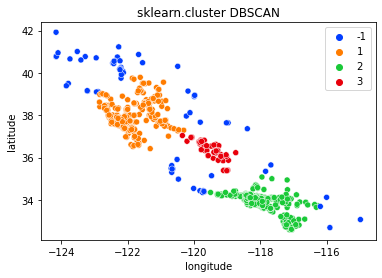

In [64]:
X = df[[cols[0], cols[1]]]
X = StandardScaler().fit_transform(X)

clusters = scanner.fit_predict(X)

sk_clusters = DBSCAN(eps=0.3, min_samples=30, metric=distance.euclidean).fit(X).labels_
sk_clusters = [x+1
               if x != -1
               else x
               for x in sk_clusters]

print(f'Same Results: {checkEqual(clusters, sk_clusters)}')

# my clusters
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1], 
                hue=clusters, palette='bright')
plt.title('Our DBSCAN')
plt.show();

# sk-learn clusters
sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1], 
                hue=sk_clusters, palette='bright')
plt.title('sklearn.cluster DBSCAN')
plt.show()

Same Results: True


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


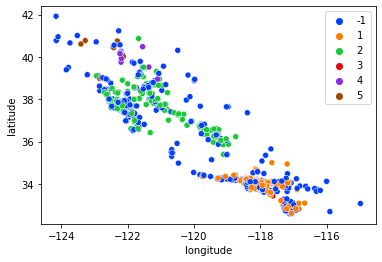

In [65]:
X = StandardScaler().fit_transform(df)

clusters = Basic_DBSCAN(eps=.85, minPts=7).fit_predict(X)
sk_clusters = DBSCAN(eps=.85, min_samples=7).fit(X)

sk_clusters = sk_clusters.labels_
sk_clusters = [x+1
               if x != -1
               else x
               for x in sk_clusters]

print(f'Same Results: {checkEqual(clusters, sk_clusters)}')

sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1], 
                hue=clusters, palette='bright')

plt.show();

# **DBSCAN_PCA**

In [66]:
df_

,0,1,2,3,4,5,6,7,8
0,-119.743833,35.440679,27.653766,3884.701907,668.071663,1537.646207,597.931519,5.738749,344700.001391
1,-119.690410,35.874918,30.464150,1510.116302,306.182373,808.649870,281.466848,3.544044,176499.999480
2,-119.656181,35.693609,26.193311,3588.056958,528.996381,1486.018150,469.943895,5.460890,270500.004378
3,-119.918834,35.490781,36.369430,67.761511,-2.102689,47.436462,30.401508,5.072713,329999.996477
4,-119.579092,36.110247,29.221460,1240.762405,250.450599,850.592817,229.553059,2.664803,81700.001091
...,...,...,...,...,...,...,...,...,...
2995,-119.623279,35.225153,34.631897,1450.381860,634.036469,1257.271984,615.971204,2.227512,224999.998202
2996,-119.026110,34.728264,24.469225,5257.255513,1075.779235,3495.429987,1043.115598,4.099721,237199.998810
2997,-119.608665,36.204752,29.639560,955.248159,220.294628,694.771406,197.832881,2.332224,62000.003458
2998,-119.831049,36.094222,33.037159,95.977427,13.904095,45.992663,14.175293,3.439397,162500.000113


In [67]:
df_ = df_.dropna() # dropping entries with missing values
df_ = df_.head(1000) # taking the first 1000 entries; ~10% of the ~10%
df_

,0,1,2,3,4,5,6,7,8
0,-119.743833,35.440679,27.653766,3884.701907,668.071663,1537.646207,597.931519,5.738749,344700.001391
1,-119.690410,35.874918,30.464150,1510.116302,306.182373,808.649870,281.466848,3.544044,176499.999480
2,-119.656181,35.693609,26.193311,3588.056958,528.996381,1486.018150,469.943895,5.460890,270500.004378
3,-119.918834,35.490781,36.369430,67.761511,-2.102689,47.436462,30.401508,5.072713,329999.996477
4,-119.579092,36.110247,29.221460,1240.762405,250.450599,850.592817,229.553059,2.664803,81700.001091
...,...,...,...,...,...,...,...,...,...
995,-119.593316,36.047889,28.950005,1471.064249,251.153529,894.125358,230.475806,3.199275,113000.004349
996,-119.699347,35.690629,30.502513,1789.187161,287.236728,896.564925,272.462998,4.537850,239899.999155
997,-120.031564,34.959289,38.860788,309.396539,5.380960,56.013828,58.136762,6.888585,500000.993599
998,-119.860557,35.263429,34.780680,1600.578135,472.700872,784.796085,451.217834,4.326304,342900.001955


In [68]:
cols = df_.columns
scanner = Basic_DBSCAN(eps=0.3, minPts=30)

def checkEqual(l1, l2):
 
    return len(l1) == len(l2) and sorted(l1) == sorted(l2)

Same Results: True


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


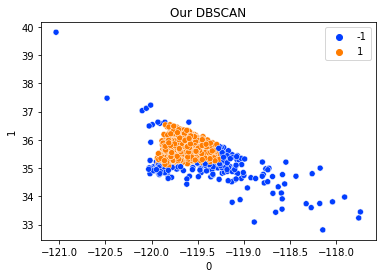

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


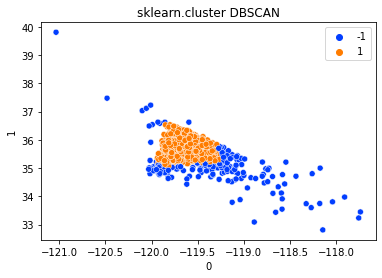

In [69]:
X = df_[[cols[0], cols[1]]]
X = StandardScaler().fit_transform(X)

clusters = scanner.fit_predict(X)

sk_clusters = DBSCAN(eps=0.3, min_samples=30, metric=distance.euclidean).fit(X).labels_
sk_clusters = [x+1
               if x != -1
               else x
               for x in sk_clusters]

print(f'Same Results: {checkEqual(clusters, sk_clusters)}')

# my clusters
sns.scatterplot(df_.iloc[:, 0], df_.iloc[:, 1], 
                hue=clusters, palette='bright')
plt.title('Our DBSCAN')
plt.show();

# sk-learn clusters
sns.scatterplot(df_.iloc[:, 0], df_.iloc[:, 1], 
                hue=sk_clusters, palette='bright')
plt.title('sklearn.cluster DBSCAN')
plt.show()

Same Results: True


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


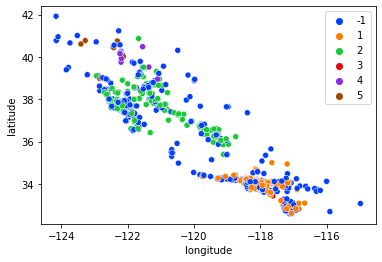

In [70]:
X = StandardScaler().fit_transform(df)

clusters = Basic_DBSCAN(eps=.85, minPts=7).fit_predict(X)
sk_clusters = DBSCAN(eps=.85, min_samples=7).fit(X)

sk_clusters = sk_clusters.labels_
sk_clusters = [x+1
               if x != -1
               else x
               for x in sk_clusters]

print(f'Same Results: {checkEqual(clusters, sk_clusters)}')

sns.scatterplot(df.iloc[:, 0], df.iloc[:, 1], 
                hue=clusters, palette='bright')

plt.show();